### Imports et initialisations

In [2]:
import numpy as np
#import os
#import tensorflow as tf
#import tensorflow.keras as keras
# Pour l'échantillonnage aléatoire
import random
#import re
#from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from clustertools import *

In [3]:
#répertoire dans lequel seront stockés les clusters, doit se terminer obligatoirement par /
cluster_dir = "clusters/1M_clusters/"
clean_dataset_file = "datasets/clean_1milliontweet.txt"
raw_dataset_file = "datasets/raw_1milliontweet.txt"

### Chargement des données en mémoire

In [4]:
with open(clean_dataset_file, "r") as file:
    lines = file.readlines()
    
clean_dataset = [line.split() for line in lines]

with open(raw_dataset_file, "r") as file:
    raw_dataset = file.read().splitlines()

### Création des échantillons
Ne pas exécuter pour travailler avec toutes les données

In [5]:
sample_size = 5000

idx_list = random.sample(range(len(clean_dataset)), sample_size)
clean_dataset = [clean_dataset[i] for i in idx_list]
raw_dataset = [raw_dataset[i] for i in idx_list]

### Encodage du jeu de données

On charge le modèle depuis le disque

In [6]:
from gensim.models import KeyedVectors

In [7]:
model = KeyedVectors.load("models/w2vec_model_d300_1M")
dim = 300

In [8]:
# Encode un message
# msg : liste de chaînes de caractères correspondant aux mots du message
# model : le modèle utilisé pour l'encodage
# dim : la dimension des vecteurs mots dans ce modèle
# Renvoie un vecteur qui est la moyenne de tous les vecteurs correspondants aux mots du message
# Si aucun mot du message n'est dans le modèle, renvoie un vecteur de zéros.
def encode(msg, model, dim):
    return np.mean([model[word] for word in msg if word in model] or [np.zeros(dim)], axis = 0)

In [9]:
%%time
#encodage de l'échantillon pour créer le jeu de données
dataset_encoded = np.array([encode(msg, model, dim) for msg in clean_dataset])

CPU times: user 153 ms, sys: 26 µs, total: 153 ms
Wall time: 152 ms


### Visualisation du dataset

- On réalise une réduction de dimension afin de visualiser les données dans une grille en deux dimensions
- On utilise pour cela la méthode PCA

In [10]:
%%time

pca = PCA(n_components=2)

#On crée une version en deux dimensions de notre jeu de données
two_dim_dataset = pca.fit_transform(dataset_encoded)

CPU times: user 1.02 s, sys: 1.44 s, total: 2.46 s
Wall time: 381 ms


In [11]:
#On utilise la matrice transposée de notre jeu de données pour pouvoir visualiser les données
b = two_dim_dataset.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

In [12]:
# Initialisation des variables globales pour le module clustertools
init_globals(clean_dataset, raw_dataset, dataset_encoded, two_dim_dataset, cluster_dir)

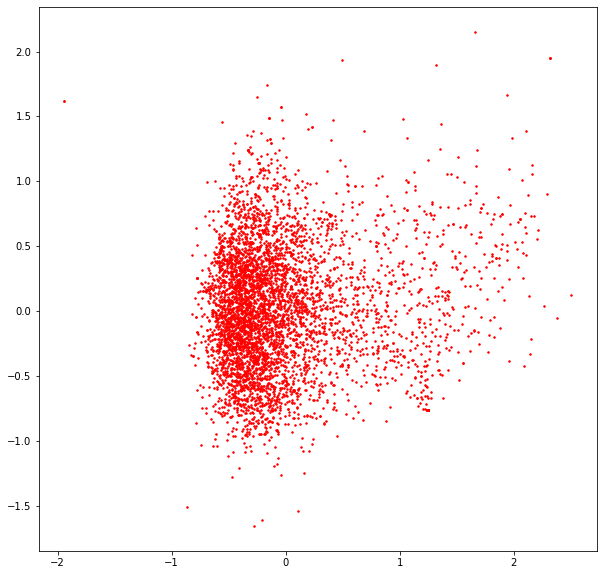

In [13]:
#Affichage des données
plt.plot(b[0], b[1], 'r.')
plt.show()

### Kmeans

Pour mémoire : méthode de calcul du nombre idéal de clusters avec la méthode du coude (elbow method)
```python
sum_of_squared_dist = []
for k in range(1, 30):
    km = KMeans(n_clusters=k)
    km.fit(dataset_encoded)
    sum_of_squared_dist.append(km.inertia_)
    
plt.plot(range(1, 60), sum_of_squared_dist, 'bx-')
plt.show
```

In [14]:
n_clust = 25

In [15]:
%%time
km_model = KMeans(n_clusters=n_clust, random_state=0)
kmeans = km_model.fit(dataset_encoded)

CPU times: user 3min 8s, sys: 1min 4s, total: 4min 13s
Wall time: 34 s


In [16]:
%%time 
km_pred = kmeans.predict(dataset_encoded)

CPU times: user 309 ms, sys: 581 ms, total: 890 ms
Wall time: 196 ms


In [17]:
%%time
km_centers = c = [[r[0] for r in model.similar_by_vector(center)] for center in km_model.cluster_centers_]

CPU times: user 1.79 s, sys: 355 ms, total: 2.15 s
Wall time: 384 ms


In [54]:
%%time
parse_results(km_pred, 'km', km_centers)


Cluster 0 : 81 messages
0 messages contiennent un mot-clé haineux (soit 0.00%)
Les 20 mots les plus fréquents : magnifique super content nuit purer lt gentil bébé jte bb mignon moche cadeau joyeux anniversaire mercii reine sourire félicitation photo 
Les mots les plus proches du centre : merciiiii cherie aussiii mbb choupi béa chouquette complimente vmin nono 

Cluster 1 : 416 messages
7 messages contiennent un mot-clé haineux (soit 1.68%)
Les 20 mots les plus fréquents : novembre projet emploi président loi programme social service travail public maire région paris semaine entreprise ensemble réseau lutter santé appel 
Les mots les plus proches du centre : généreusement formaliser châteauroux adressage kinoi dragy savoyard laphp lassnat invirable 

Cluster 2 : 603 messages
8 messages contiennent un mot-clé haineux (soit 1.33%)
Les 20 mots les plus fréquents : comprendre genre problème truc connaître trouve ca çer grave part devenir moment histoire avis aimer changer coup jeu entendre 